Empty DataFrame
Columns: [Unnamed: 0, CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, item1, item2, item3, item4, item5, item6, item7, item8, index]
Index: []

[0 rows x 53 columns]
Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job             

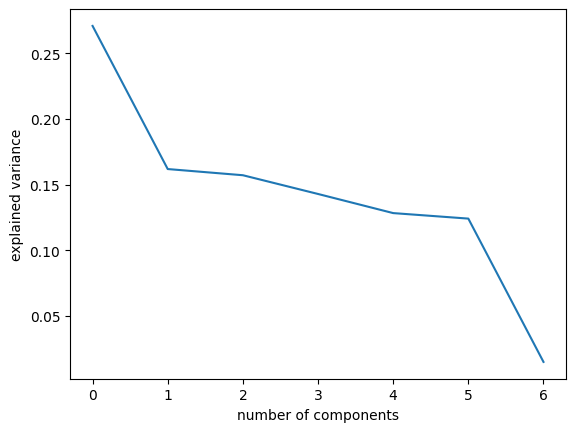

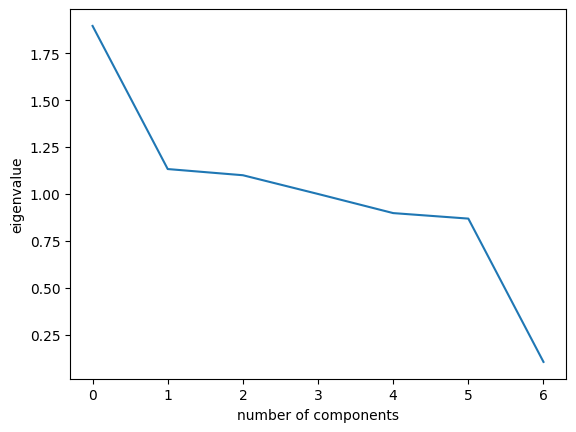

In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/cali/Downloads/d206-churn/churn_raw_data.csv")
df.shape
df['index']=pd.Series(range(0,10000)) #added index starting at 0 since python starts at the 0 place instead of 1
dupcustomer= df[df.duplicated(['Customer_id'])] #checking for duplicated records
print(dupcustomer) 
print(df.isna().sum()) #checking for NaN values. Below is the work to fill the NaN values with the mean values
median_children= df ['Children'].median()
print(median_children)
df['Children'] = df['Children'].fillna(median_children)
mean_age= df['Age'].mean()
print(mean_age)
df['Age'] = df['Age'].fillna(mean_age)
mean_income = df['Income'].mean()
print(mean_income)
df['Income'] = df['Income'].fillna(mean_income)
mean_tenure= df['Tenure'].mean()
print(mean_tenure)
df['Tenure'] = df['Tenure'].fillna(mean_tenure)
mean_bw = df['Bandwidth_GB_Year'].mean()
print(mean_bw)
df['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(mean_bw)
mode_techie = df['Techie'].mode()
print(mode_techie)
df['Techie'] = df['Techie'].fillna('No')
df['Phone']= df['Phone'].fillna('No')
df['TechSupport'] = df['TechSupport'].fillna('No')
z_population = np.abs(stats.zscore(df['Population'])) #(Cloud, 2023)
outliers_population = df[(z_population > 3)]
print(outliers_population[['Population','Area', 'City']])
z_children = np.abs(stats.zscore(df['Children']))
outliers_children = df[(z_children > 3)]
print(outliers_children[['Customer_id','Children']])
filter_children = df[df['Children'] > 12] 
select_children = filter_children[['Age', 'Children']]
print(select_children) #shows how many customers have more than 12 children. None found. Outliers are being left untouched. 
z_age = np.abs(stats.zscore(df['Age']))
outliers_age = df[(z_age > 3)]
print(outliers_age[['Customer_id','Age']])
filter_age = df[df['Age'] < 18]
select_age = filter_age[['Customer_id','Age']]
print("Under 18 Years Old:")
print(filter_age)
z_income = np.abs(stats.zscore(df['Income']))
outliers_income = df[(z_income > 3)]
print(outliers_income[['Job','Income']])
filter_income = df[df['Income'] > 200000.00] #only 3 records return and with job seem reasonable. Leaving untouched.
select_income = filter_income[['Job', 'Income']]
print(select_income)
z_tenure = np.abs(stats.zscore(df['Tenure']))
outliers_tenure = df[(z_tenure > 3)]
print(outliers_tenure) #no outliers found
z_bandwidth = np.abs(stats.zscore(df['Bandwidth_GB_Year']))
outliers_bandwidth = df[z_bandwidth > 3]
print(outliers_bandwidth)
z_outage = np.abs(stats.zscore(df['Outage_sec_perweek']))
outlier_outage = df[z_outage > 5]
print(outlier_outage[['Outage_sec_perweek', 'Area']])
z_email = np.abs(stats.zscore(df['Email']))
outlier_email = df[z_email > 3]
print(outlier_email[['Email', 'Customer_id']])
z_contacts = np.abs(stats.zscore(df['Contacts']))
outlier_contacts = df[z_contacts > 5]
print(outlier_contacts[['Customer_id', 'Contacts']])
z_eqfail = np.abs(stats.zscore(df['Yearly_equip_failure']))
outlier_eqfail = df[z_eqfail > 5]
print(outlier_eqfail[['Customer_id', 'Yearly_equip_failure']])
z_monthlycharge= np.abs(stats.zscore(df['MonthlyCharge']))
outlier_monthlycharge =df[z_monthlycharge > 3]
print(outlier_monthlycharge[['Customer_id', 'MonthlyCharge']])
print(df['Area'].unique())
print(df['Timezone'].unique())
print(df['Job'].unique())
print(df['Education'].unique())
print(df['Employment'].unique())
print(df['Marital'].unique())
print(df['Gender'].unique())
print(df['Churn'].unique())
print(df['Techie'].unique())
print(df['Contract'].unique())
print(df['Port_modem'].unique())
print(df['Tablet'].unique())
print(df['InternetService'].unique())
print(df['Phone'].unique())
print(df['Multiple'].unique())
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['PaperlessBilling'].unique())
print(df['PaymentMethod'].unique())
print(df['item1'].unique())
print(df['item2'].unique())
print(df['item3'].unique())
print(df['item4'].unique())
print(df['item5'].unique())
print(df['item6'].unique())
print(df['item7'].unique())
print(df['item8'].unique())
cont_df = df[['Lat','Lng','Income','Outage_sec_perweek','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
df_normalized = (cont_df.apply(lambda x: (x - x.mean()) / x.std()))
pca = PCA(n_components=cont_df.shape[1]) #Below used with help from PCA 206 Video (Middleton, N.D.)
pca.fit(df_normalized)
df_pca = pd.DataFrame(pca.transform(df_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()
cov_matrix = np.dot(df_normalized.T, df_normalized) / cont_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'],
     index=cont_df.columns)
loadings
df.to_csv("Cleaned_Data_Revised")

##### 